<a href="https://colab.research.google.com/github/sim017/DL_Based_Clustering_Covid19/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
%matplotlib inline


In [ ]:
!apt-get install geos
!pip3 install https://github.com/matplotlib/basemap/archive/master.zip

In [4]:
df = pd.read_excel("/content/SurveyData.xlsx")
dataset=pd.read_excel("/content/SurveyData.xlsx")

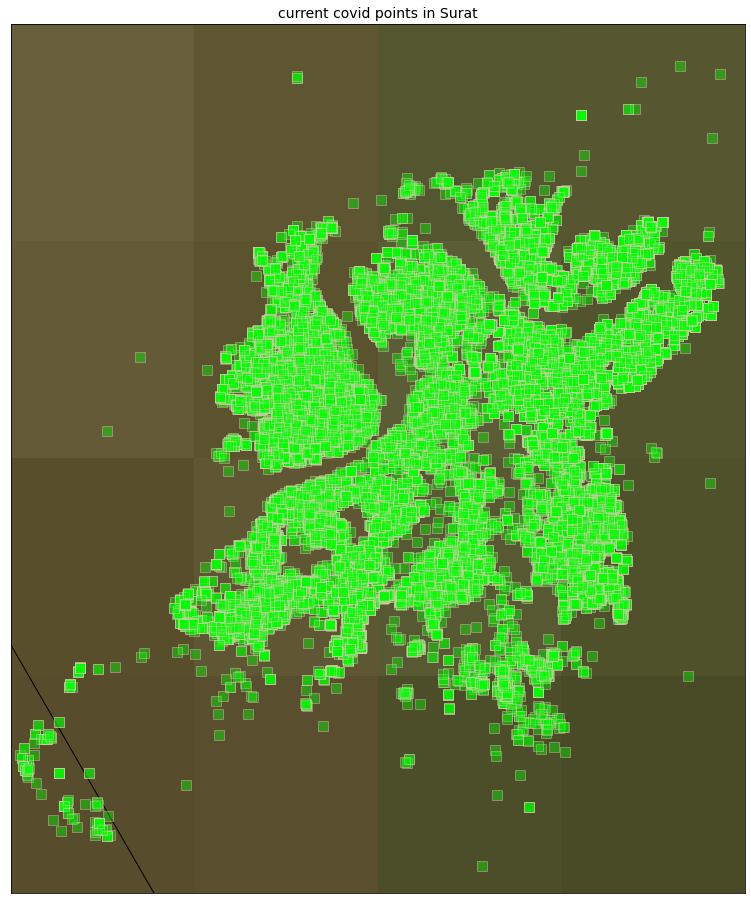

In [ ]:
# print(df)
llong =72.700080 
ulong= 72.920030
llat = 21.063280
ulat = 21.306330
rcParams['figure.figsize'] = (24,16)
# dataset = dataset[[(dataset['Longitude']>llong) & (dataset['Longitude']<ulong) & (dataset['Latitude']>llat) &(dataset['Latitude']<ulat )] ]
mymap = Basemap(projection="merc",resolution='c',llcrnrlon=llong,llcrnrlat=llat,urcrnrlon=ulong,urcrnrlat=ulat)
mymap.drawcoastlines()
mymap.drawcountries()
mymap.drawlsmask(land_color='orange',ocean_color='skyblue')
mymap.bluemarble()
xs,ys = mymap(np.asarray(dataset["Longitude"]),np.asarray(dataset["Latitude"]))
dataset['xm']=xs.tolist()
dataset['ym']=ys.tolist()
for index,row in dataset.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   mymap.plot(row.xm, row.ym,markerfacecolor ='lime',markeredgecolor='pink', marker='s', markersize= 10, alpha = 0.4)
#plt.text(x,y,stn)
plt.title("current covid points in Surat", fontsize=14)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# np.asarray(dataset["Longitude"])
# print(df.Longitude)
print(dataset['xm'])

(0.0, 0.002)

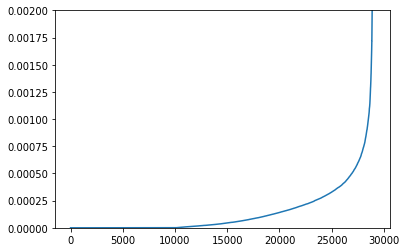

In [6]:
#for calculating the optimum value for epsilon
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=50)
nbrs = neigh.fit(dataset[["Latitude","Longitude"]])
distances, indices = nbrs.kneighbors(dataset[["Latitude","Longitude"]])
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
# plt.xlim(-5, 5)
plt.ylim(0 , .002)

In [18]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
covid_df = dataset[["Latitude","Longitude"]]
print("Length of the covid_df " + str(len(covid_df)) )
df = StandardScaler().fit_transform(covid_df)
print("Length of the df "+ str(len(df)))
print(df)
db = DBSCAN(eps=0.0005,min_samples=100).fit(df)
labels = db.labels_
print(labels[0:500])
dataset['CLus_Db']=labels
realclustername = len(set(labels))-(1 if -1 in labels else 0)
clustername = len(set(labels))


Length of the covid_df 29139
Length of the df 29139
[[ 0.03164648  0.03004509]
 [-0.06707664  0.02139062]
 [-0.01998601  0.02537806]
 ...
 [-0.09926553  0.03862627]
 [-0.06730429  0.04518204]
 [-0.08427174  0.04400696]]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -

In [15]:
print(len(labels))
print(len(dataset.CLus_Db))
print(dataset)

29139
29139
            Date   Latitude  Longitude  CLus_Db            xm            ym
0     2021-04-03  21.223025  72.808018        0  12002.175691  19044.873960
1     2021-04-03  21.169480  72.790440        0  10047.568840  12658.938215
2     2021-04-03  21.195021  72.798539        0  10948.130567  15704.721344
3     2021-04-03  21.134580  72.772360        0   8037.165513   8497.891669
4     2021-04-03  21.166400  72.814610        0  12735.148952  12291.677450
...          ...        ...        ...      ...           ...           ...
29134 2021-04-16  21.214842  72.891161        0  21247.227773  18068.812380
29135 2021-04-16  21.238677  72.881378        0  20159.408318  20912.041677
29136 2021-04-16  21.152022  72.825448        0  13940.228962  10577.289655
29137 2021-04-16  21.169357  72.838763        0  15420.845422  12644.215442
29138 2021-04-16  21.160154  72.836376        0  15155.454392  11546.904436

[29139 rows x 6 columns]


            Date   Latitude  Longitude  CLus_Db            xm            ym
0     2021-04-03  21.223025  72.808018        0  12002.175691  19044.873960
1     2021-04-03  21.169480  72.790440        0  10047.568840  12658.938215
2     2021-04-03  21.195021  72.798539        0  10948.130567  15704.721344
3     2021-04-03  21.134580  72.772360        0   8037.165513   8497.891669
4     2021-04-03  21.166400  72.814610        0  12735.148952  12291.677450
...          ...        ...        ...      ...           ...           ...
29134 2021-04-16  21.214842  72.891161        0  21247.227773  18068.812380
29135 2021-04-16  21.238677  72.881378        0  20159.408318  20912.041677
29136 2021-04-16  21.152022  72.825448        0  13940.228962  10577.289655
29137 2021-04-16  21.169357  72.838763        0  15420.845422  12644.215442
29138 2021-04-16  21.160154  72.836376        0  15155.454392  11546.904436

[29139 rows x 6 columns]
28575
Cluster 0, data points 28575
564


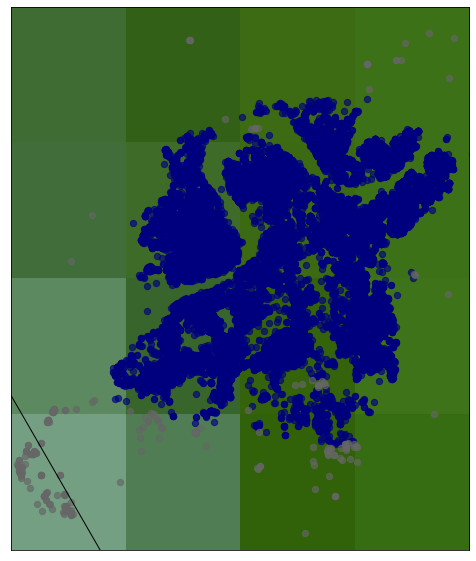

In [16]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)
llong =72.700080 
ulong= 72.920030
llat = 21.063280
ulat = 21.306330
# my_map = Basemap(projection='merc',
#             resolution = 'l', area_thresh = 500.0,
#             llcrnrlon=llong, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
#             urcrnrlon=ulong, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)
# xs,ys = mymap(np.asarray(dataset["Longitude"]),np.asarray(dataset["Latitude"]))
mymap = Basemap(projection="merc",resolution='c',llcrnrlon=llong,llcrnrlat=llat,urcrnrlon=ulong,urcrnrlat=ulat)
mymap.drawcoastlines()
mymap.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white', alpha = 0.3)
mymap.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
#my_map.bluemarble()
#my_map.shadedrelief()
mymap.etopo()
xs,ys = mymap(np.asarray(dataset["Longitude"]),np.asarray(dataset["Latitude"]))
dataset['xm']=xs.tolist()
dataset['ym']=ys.tolist()
# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clustername))
print(dataset)
# dataset['xm']=xs.tolist()
# dataset['ym']=ys.tolist()

#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = dataset[dataset.CLus_Db == clust_number] 
    dates = dataset[dataset.CLus_Db==clust_number].Date 
    print(len(clust_set))                  
    mymap.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 40, alpha = 0.65)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 

        # plt.text(cenx,ceny,str(clust_number), fontsize=30, color='red',)
        print ("Cluster "+str(clust_number) + ", data points "+ str(len(clust_set)))
# plt.title(r"Weather Stations in Canada Clustered (1): $ \epsilon = 0.3$", fontsize=14)        
plt.savefig("etopo_cluster.png", dpi=300)

In [10]:
coresamples = db.core_sample_indices_
print(len(coresamples))

23659


14
2021-04-15 00:00:00
            Date   Latitude  Longitude  CLus_Db            xm            ym
26787 2021-04-15  21.173610  72.793700        1  10410.064131  13151.413513
26788 2021-04-15  21.236220  72.877992        3  19782.901362  20618.917909
26789 2021-04-15  21.173260  72.797290        1  10809.253729  13109.677785
26790 2021-04-15  21.151657  72.820843        1  13428.226603  10533.832409
26791 2021-04-15  21.235968  72.883448        3  20389.559469  20588.891221
...          ...        ...        ...      ...           ...           ...
28582 2021-04-15  21.170880  72.809080        1  12120.241297  12825.877453
28583 2021-04-15  21.195642  72.797179        2  10796.955576  15778.798923
28584 2021-04-15  21.222574  72.787411        2   9710.737327  18991.077713
28585 2021-04-15  21.196461  72.806625        2  11847.235642  15876.512440
28586 2021-04-15  21.152406  72.825918        1  13992.496112  10623.062415

[1800 rows x 6 columns]
496
Cluster 0, data points 496
436
Clust

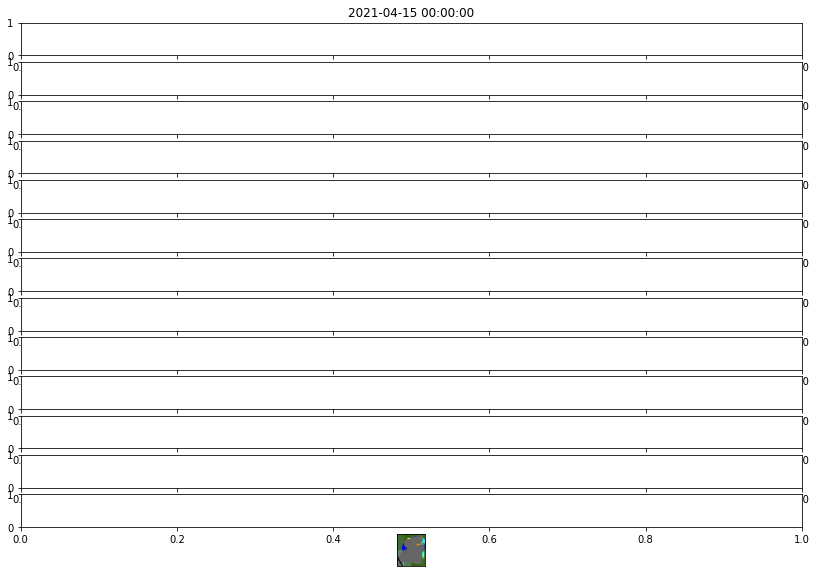

2021-04-04 00:00:00
           Date   Latitude  Longitude  CLus_Db            xm            ym
2313 2021-04-04  21.151366  72.880574        9  20070.007639  10499.125349
2314 2021-04-04  21.236199  72.779468        5   8827.587605  20616.454454
2315 2021-04-04  21.200957  72.848765        0  16533.009883  16412.710265
2316 2021-04-04  21.234124  72.785258        5   9471.318084  20368.871245
2317 2021-04-04  21.785750  72.564565       -1 -15068.573389  86298.947736
...         ...        ...        ...      ...           ...           ...
4553 2021-04-04  21.163619  72.880842        6  20099.807865  11960.076165
4554 2021-04-04  21.157665  72.858533        9  17619.161415  11250.153190
4555 2021-04-04  21.165650  72.863262        6  18145.001976  12202.248227
4556 2021-04-04  21.184863  72.838817       -1  15426.843274  14493.329428
4557 2021-04-04  21.146249  72.881146        9  20133.611107   9889.050522

[2245 rows x 6 columns]
498
Cluster 0, data points 498
563
Cluster 1, data poin

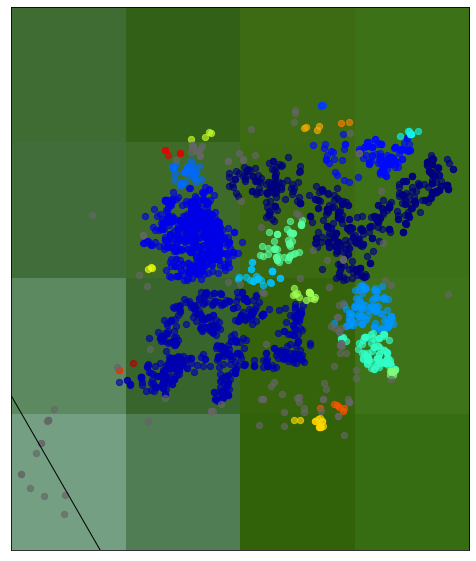

2021-04-12 00:00:00
            Date   Latitude  Longitude  CLus_Db            xm            ym
21111 2021-04-12  21.250164  72.842434       16  15828.993992  22282.429989
21112 2021-04-12  21.247594  72.783373       -1   9261.799142  21975.793571
21113 2021-04-12  21.148720  72.827422        1  14159.766562  10183.676953
21114 2021-04-12  21.221187  72.787652        2   9737.505269  18825.661755
21115 2021-04-12  21.140850  72.762640        1   6956.351335   9245.377066
...          ...        ...        ...      ...           ...           ...
23036 2021-04-12  21.150412  72.819148       -1  13239.784650  10385.418775
23037 2021-04-12  21.122378  72.837890       15  15323.743386   7043.318494
23038 2021-04-12  21.146422  72.831577        1  14621.847981   9909.699965
23039 2021-04-12  21.185642  72.776938        2   8546.227879  14586.217925
23040 2021-04-12  21.216937  72.861151        0  17910.236237  18318.750024

[1930 rows x 6 columns]
538
Cluster 0, data points 538
472
Cluster 

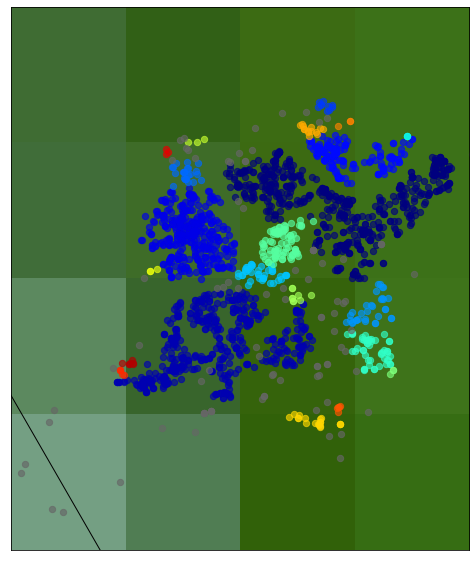

2021-04-11 00:00:00
            Date   Latitude  Longitude  CLus_Db            xm            ym
18987 2021-04-11  21.239743  72.856662        3  17411.126925  21039.189553
18988 2021-04-11  21.232065  72.834559        0  14953.413305  20123.301596
18989 2021-04-11  21.222630  72.810273        0  12252.890110  18997.825644
18990 2021-04-11  21.214505  72.826265        0  14031.156346  18028.557174
18991 2021-04-11  21.194426  72.824677       10  13854.592229  15633.769930
...          ...        ...        ...      ...           ...           ...
21106 2021-04-11  21.221817  72.816467        0  12941.626714  18900.762797
21107 2021-04-11  21.206314  72.789535        2   9946.949711  17051.609689
21108 2021-04-11  21.206721  72.769484        2   7717.396854  17100.149665
21109 2021-04-11  21.156170  72.772280        1   8028.269923  11071.901906
21110 2021-04-11  21.162953  72.779424        1   8822.629426  11880.699063

[2124 rows x 6 columns]
672
Cluster 0, data points 672
438
Cluster 

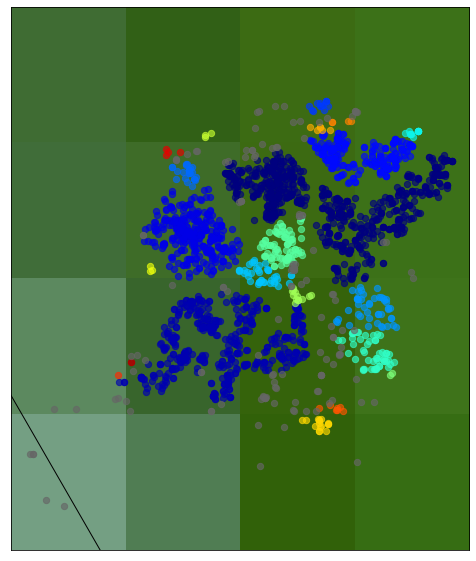

2021-04-14 00:00:00
            Date   Latitude  Longitude  CLus_Db            xm             ym
24890 2021-04-14  21.186357  72.814911        7  12768.633064   14671.449523
24891 2021-04-14  21.186357  72.814911        7  12768.633064   14671.449523
24892 2021-04-14  21.239051  72.882296        3  20261.485213   20956.659048
24893 2021-04-14  21.191919  72.878730        0  19864.997649   15334.854517
24894 2021-04-14  21.228506  72.809942        0  12216.093503   19698.708506
...          ...        ...        ...      ...           ...            ...
26782 2021-04-14  21.293729  72.023626       -1 -75218.198586   27480.865162
26783 2021-04-14  21.215888  72.775029        2   8333.987999   18193.637624
26784 2021-04-14  21.209043  72.789411        2   9933.192681   17377.146278
26785 2021-04-14  21.927327  72.917383       -1  24162.937513  103260.816117
26786 2021-04-14  21.170406  72.870277        6  18925.034019   12769.356420

[1897 rows x 6 columns]
474
Cluster 0, data points 474


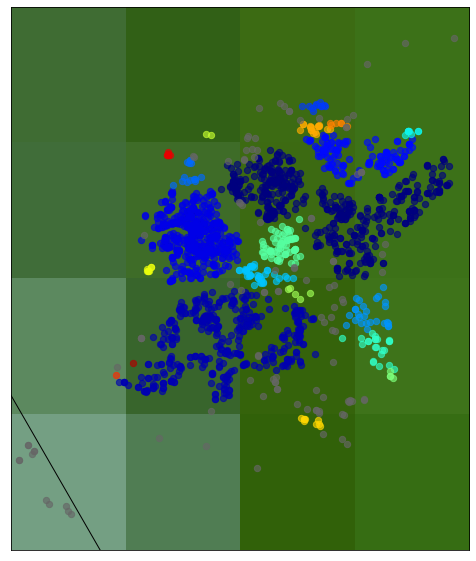

2021-04-10 00:00:00
            Date   Latitude  Longitude  CLus_Db            xm            ym
16144 2021-04-10  21.157015  72.870150        9  18910.912270  11172.652411
16145 2021-04-10  21.175310  72.844084       12  16012.506676  13354.131310
16146 2021-04-10  21.241242  72.880264        3  20035.592826  21218.090485
16147 2021-04-10  21.225124  72.849576        0  16623.176695  19295.310961
16148 2021-04-10  21.176426  72.844279       12  16034.189677  13487.210849
...          ...        ...        ...      ...           ...           ...
18982 2021-04-10  21.219969  72.774288        2   8251.597045  18680.415625
18983 2021-04-10  21.196573  72.837011       10  15225.983077  15889.865187
18984 2021-04-10  21.204861  72.823135       10  13683.126397  16878.297173
18985 2021-04-10  21.196573  72.837011       10  15225.983077  15889.865187
18986 2021-04-10  21.116529  72.847756       15  16420.847613   6346.049384

[2843 rows x 6 columns]
1003
Cluster 0, data points 1003
491
Cluste

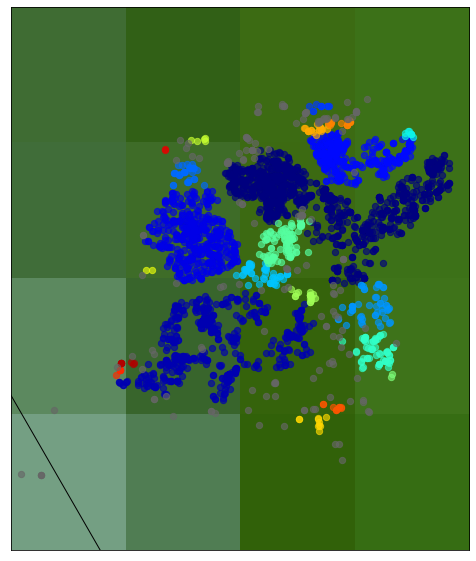

2021-04-16 00:00:00
            Date   Latitude  Longitude  CLus_Db            xm            ym
28587 2021-04-16  21.221067  72.817075        0  13009.284347  18811.346549
28588 2021-04-16  21.224397  72.826713        0  14080.926060  19208.612431
28589 2021-04-16  21.221080  72.825101        0  13901.716617  18812.874570
28590 2021-04-16  21.250943  72.841595       16  15735.754866  22375.371527
28591 2021-04-16  21.201614  72.866070        0  18457.281660  16491.080878
...          ...        ...        ...      ...           ...           ...
29134 2021-04-16  21.214842  72.891161        0  21247.227773  18068.812380
29135 2021-04-16  21.238677  72.881378        3  20159.408318  20912.041677
29136 2021-04-16  21.152022  72.825448        1  13940.228962  10577.289655
29137 2021-04-16  21.169357  72.838763        1  15420.845422  12644.215442
29138 2021-04-16  21.160154  72.836376        1  15155.454392  11546.904436

[552 rows x 6 columns]
187
Cluster 0, data points 187
186
Cluster 1

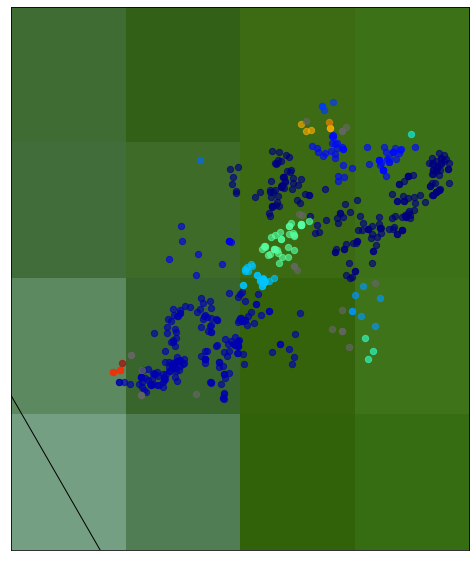

2021-04-06 00:00:00
           Date   Latitude  Longitude  CLus_Db            xm            ym
7110 2021-04-06  21.204676  72.885427        0  20609.636364  16856.270349
7111 2021-04-06  21.229813  72.877325        3  19708.735493  19854.619254
7112 2021-04-06  21.147804  72.834494        1  14946.178967  10074.401592
7113 2021-04-06  21.185291  72.791392        2  10153.374099  14544.388168
7114 2021-04-06  21.225603  72.900086        0  22239.642026  19352.413582
...         ...        ...        ...      ...           ...           ...
9392 2021-04-06  21.243340  72.854163        3  17133.195336  21468.362772
9393 2021-04-06  21.232523  72.802672        0  11407.655617  20177.843305
9394 2021-04-06  21.147522  72.826832        1  14094.128227  10040.845948
9395 2021-04-06  21.230184  72.856591        3  17403.184275  19898.870106
9396 2021-04-06  21.209827  72.889119        0  21020.167840  17470.641579

[2287 rows x 6 columns]
650
Cluster 0, data points 650
523
Cluster 1, data poin

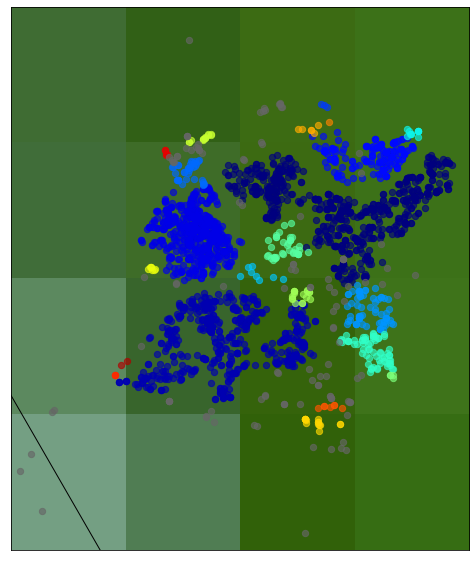

2021-04-13 00:00:00
            Date   Latitude  Longitude  CLus_Db            xm            ym
23041 2021-04-13  21.233904  72.818188        0  13133.057586  20342.700559
23042 2021-04-13  21.220206  72.808951        0  12105.928293  18708.637887
23043 2021-04-13  21.198790  72.833670       10  14854.545495  16154.296045
23044 2021-04-13  21.225853  72.812295        0  12477.731706  19382.230600
23045 2021-04-13  21.241922  72.821591        0  13511.384802  21299.144086
...          ...        ...        ...      ...           ...           ...
24885 2021-04-13  21.236509  72.870205        3  18917.027988  20653.406313
24886 2021-04-13  21.209130  72.829465       10  14386.993287  17387.519512
24887 2021-04-13  21.226264  72.894878        0  21660.539121  19431.262503
24888 2021-04-13  21.154199  72.837961        1  15331.615983  10836.922964
24889 2021-04-13  21.154620  72.836955        1  15219.753940  10887.070937

[1849 rows x 6 columns]
579
Cluster 0, data points 579
370
Cluster 

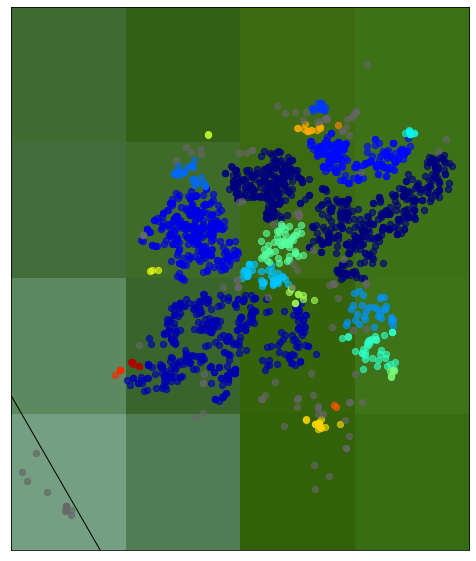

2021-04-07 00:00:00
            Date   Latitude  Longitude  CLus_Db            xm            ym
9397  2021-04-07  21.235843  72.871459        3  19056.466360  20573.955438
9398  2021-04-07  21.216406  72.846220        0  16250.018928  18255.364720
9399  2021-04-07  21.222094  72.896453        0  21835.671048  18933.840280
9400  2021-04-07  21.219885  72.857530        0  17507.666315  18670.367270
9401  2021-04-07  21.207057  72.791096        2  10120.529357  17140.263202
...          ...        ...        ...      ...           ...           ...
11685 2021-04-07  21.223986  72.808824        0  12091.775409  19159.479755
11686 2021-04-07  21.189148  72.790939        2  10103.045075  15004.361153
11687 2021-04-07  21.212353  72.787609        2   9732.807286  17771.952522
11688 2021-04-07  21.236115  72.786518        5   9611.494790  20606.426467
11689 2021-04-07  21.219226  72.810375       -1  12264.260898  18591.761514

[2293 rows x 6 columns]
555
Cluster 0, data points 555
502
Cluster 

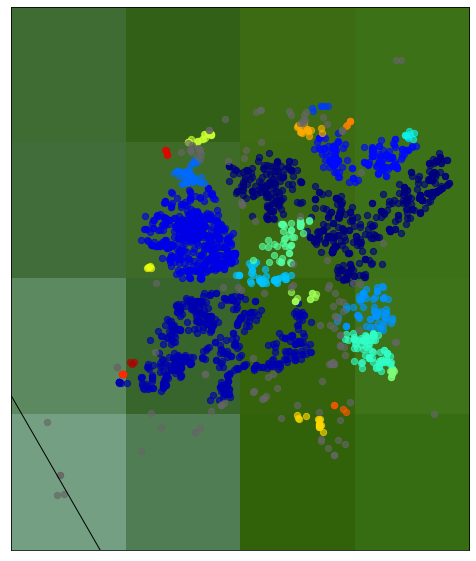

2021-04-08 00:00:00
            Date   Latitude  Longitude  CLus_Db            xm            ym
11690 2021-04-08  21.215280  72.784371        2   9372.747163  18121.088584
11691 2021-04-08  21.221876  72.883605        0  20407.039303  18907.836340
11692 2021-04-08  21.213828  72.785102        2   9453.982803  17947.881240
11693 2021-04-08  21.221876  72.883605        0  20407.039303  18907.836340
11694 2021-04-08  21.221876  72.883605        0  20407.039303  18907.836340
...          ...        ...        ...      ...           ...           ...
13870 2021-04-08  21.244172  72.787213       -1   9688.741869  21567.603927
13871 2021-04-08  21.209169  72.794170        2  10462.321274  17392.134214
13872 2021-04-08  21.210969  72.785903        2   9543.047673  17606.872447
13873 2021-04-08  21.195138  72.790485        2  10052.565938  15718.739446
13874 2021-04-08  21.207687  72.784416        2   9377.743149  17215.421463

[2185 rows x 6 columns]
601
Cluster 0, data points 601
455
Cluster 

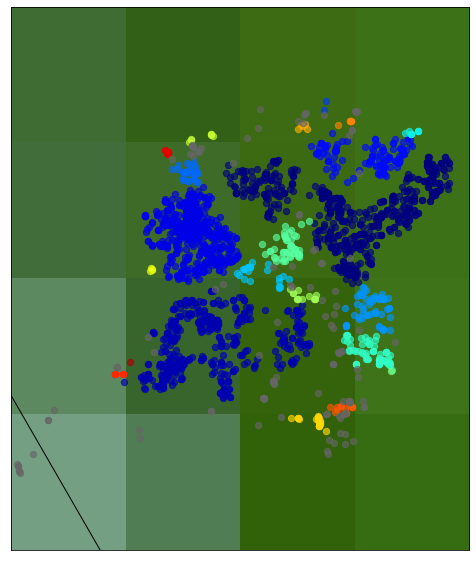

2021-04-09 00:00:00
            Date   Latitude  Longitude  CLus_Db            xm            ym
13875 2021-04-09  21.122552  72.841024       15  15672.261481   7064.059974
13876 2021-04-09  21.234574  72.856760        3  17422.010679  20422.555990
13877 2021-04-09  21.244376  72.854736        3  17196.983388  21591.874758
13878 2021-04-09  21.237342  72.852017        3  16894.596711  20752.828972
13879 2021-04-09  21.217017  72.825624        0  13959.874872  18328.297202
...          ...        ...        ...      ...           ...           ...
16139 2021-04-09  21.223474  72.776751        2   8525.462236  19098.410329
16140 2021-04-09  21.193896  72.782755        2   9193.090717  15570.622076
16141 2021-04-09  21.189766  72.813996        7  12666.908657  15078.054161
16142 2021-04-09  21.245752  72.857216        3  17472.750012  21756.134434
16143 2021-04-09  21.198418  72.788177        2   9795.887026  16109.854238

[2269 rows x 6 columns]
714
Cluster 0, data points 714
424
Cluster 

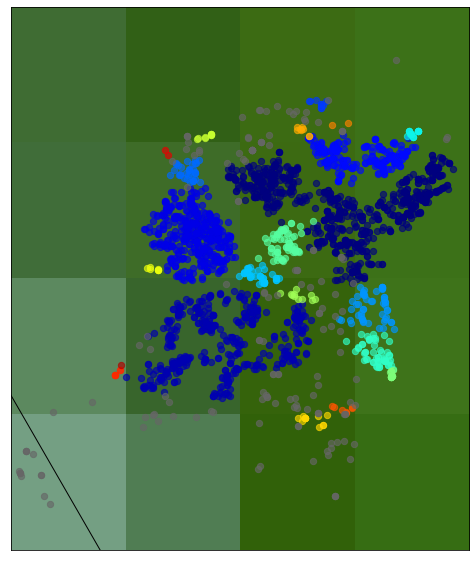

2021-04-05 00:00:00
           Date   Latitude  Longitude  CLus_Db            xm            ym
4558 2021-04-05  21.166473  72.869826        6  18874.885130  12300.381919
4559 2021-04-05  21.203427  72.798746        2  10971.170145  16707.319266
4560 2021-04-05  21.200534  72.794145        2  10459.562529  16362.284190
4561 2021-04-05  21.161850  72.777160        1   8570.900910  11749.147126
4562 2021-04-05  21.160560  72.771030        1   7889.276330  11595.333871
...         ...        ...        ...      ...           ...           ...
7105 2021-04-05  21.205525  72.872036        0  19120.592444  16957.483284
7106 2021-04-05  21.168800  72.834573        1  14954.965586  12577.842088
7107 2021-04-05  21.122881  72.847671       15  16411.329332   7103.313888
7108 2021-04-05  21.213431  72.889128        0  21021.146355  17900.463712
7109 2021-04-05  21.241242  72.880264        3  20035.592826  21218.090485

[2552 rows x 6 columns]
725
Cluster 0, data points 725
560
Cluster 1, data poin

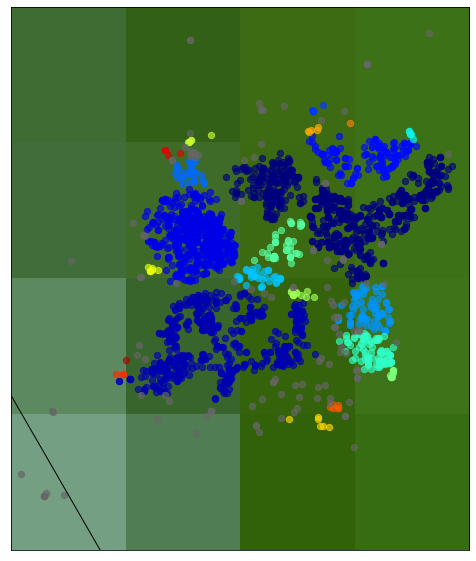

2021-04-03 00:00:00
           Date   Latitude  Longitude  CLus_Db            xm            ym
0    2021-04-03  21.223025  72.808018        0  12002.175691  19044.873960
1    2021-04-03  21.169480  72.790440        1  10047.568840  12658.938215
2    2021-04-03  21.195021  72.798539        2  10948.130567  15704.721344
3    2021-04-03  21.134580  72.772360        1   8037.165513   8497.891669
4    2021-04-03  21.166400  72.814610        1  12735.148952  12291.677450
...         ...        ...        ...      ...           ...           ...
2308 2021-04-03  21.222094  72.896453        0  21835.671048  18933.840280
2309 2021-04-03  21.154161  72.842467        1  15832.704565  10832.368400
2310 2021-04-03  21.139207  72.769546        1   7724.256465   9049.469649
2311 2021-04-03  21.150844  72.836517        1  15171.050585  10436.900805
2312 2021-04-03  21.168328  72.833847        1  14874.171390  12521.560331

[2313 rows x 6 columns]
634
Cluster 0, data points 634
540
Cluster 1, data poin

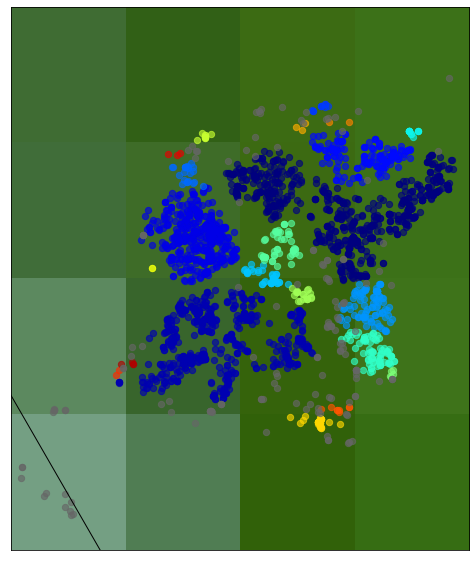

In [25]:
import matplotlib.pyplot as plt
print((len(set(dataset["Date"]))))
rows = len(set(dataset["Date"]))
columns = 1
fig, axes = plt.subplots(rows,columns)
i = 0
rcParams['figure.figsize'] = (14,10)
for dates in set(dataset["Date"]):
  print(dates)
  mymap = Basemap(projection="merc",resolution='c',llcrnrlon=llong,llcrnrlat=llat,urcrnrlon=ulong,urcrnrlat=ulat)
  mymap.drawcoastlines()
  mymap.drawcountries()
  #my_map.drawmapboundary()
  #my_map.fillcontinents(color = 'white', alpha = 0.3)
  mymap.drawlsmask(land_color='orange', ocean_color='skyblue')
  #my_map.shadedrelief()
  #my_map.bluemarble()
  #my_map.shadedrelief()
  mymap.etopo()

  axes[i].set_title(str(dates))
  date_clust_set = dataset[dataset.Date == dates]
  print(date_clust_set)
  for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = date_clust_set[date_clust_set.CLus_Db == clust_number] 
    # dates = dataset[dataset.CLus_Db==clust_number].Date 
    print(len(clust_set))                  
    mymap.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 40, alpha = 0.65)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 

        # plt.text(cenx,ceny,str(clust_number), fontsize=30, color='red',)
        print ("Cluster "+str(clust_number) + ", data points "+ str(len(clust_set)))      
  plt.savefig("etopo_cluster"+str(dates)+".png", dpi=300)
  i = i+1
  plt.show()
  
 
  

In [ ]:
dataset.to_excel(r'void_clusters.xlsx')

In [ ]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
date_feature = dataset["Date"]
# print((date_feature[0].weekday()))
# print(date_feature[0].weekday())
# print(type([date.weekday() for date in date_feature][0]))
date_no = [date.weekday() for date in date_feature]
print(date_no)
dataset["date_feature"] = date_no
covid_df_date = dataset[["Latitude","Longitude","date_feature"]]
df_date = StandardScaler().fit_transform(covid_df_date)
db_date = DBSCAN(eps=0.3,min_samples=50).fit(covid_df_date)
labels_date = db_date.labels_
print(labels_date[0:500])
dataset['CLus_Db_date']=labels_date
realclustername_date = len(set(labels_date))-(1 if -1 in labels_date else 0)
clustername_date = len(set(labels_date))

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

In [ ]:
print(len(labels_date))
print(len(dataset.CLus_Db_date))

29139
29139


5120
Cluster 0, data points 5120
4342
Cluster 1, data points 4342
4449
Cluster 2, data points 4449
4106
Cluster 3, data points 4106
4148
Cluster 4, data points 4148
3962
Cluster 5, data points 3962
2808
Cluster 6, data points 2808
204


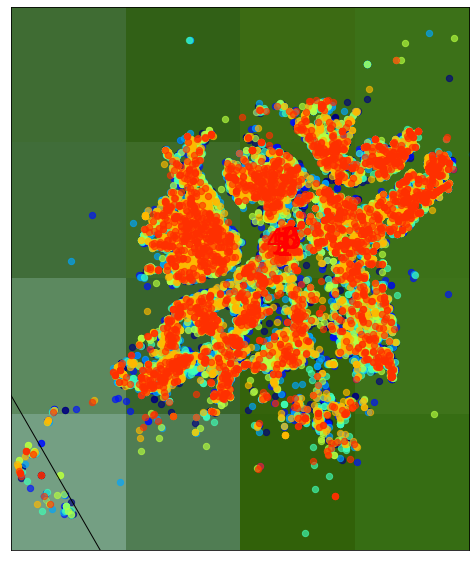

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)
llong =72.700080 
ulong= 72.920030
llat = 21.063280
ulat = 21.306330
# my_map = Basemap(projection='merc',
#             resolution = 'l', area_thresh = 500.0,
#             llcrnrlon=llong, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
#             urcrnrlon=ulong, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)
# xs,ys = mymap(np.asarray(dataset["Longitude"]),np.asarray(dataset["Latitude"]))
mymap = Basemap(projection="merc",resolution='c',llcrnrlon=llong,llcrnrlat=llat,urcrnrlon=ulong,urcrnrlat=ulat)
mymap.drawcoastlines()
mymap.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white', alpha = 0.3)
mymap.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
#my_map.bluemarble()
#my_map.shadedrelief()
mymap.etopo()
xs,ys = mymap(np.asarray(dataset["Longitude"]),np.asarray(dataset["Latitude"]))
dataset['xm']=xs.tolist()
dataset['ym']=ys.tolist()
# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clustername_date))

# dataset['xm']=xs.tolist()
# dataset['ym']=ys.tolist()

#Visualization1
for clust_number in set(labels_date):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = dataset[dataset.CLus_Db_date == clust_number]  
    print(len(clust_set))                  
    mymap.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 40, alpha = 0.65)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 

        plt.text(cenx,ceny,str(clust_number), fontsize=30, color='red',)
        print ("Cluster "+str(clust_number) + ", data points "+ str(len(clust_set)))
# plt.title(r"Weather Stations in Canada Clustered (1): $ \epsilon = 0.3$", fontsize=14)        
plt.savefig("etopo_cluster.png", dpi=300)

In [2]:
!apt-get install geos
!pip3 install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package geos
     / 146.9MB 977kB/s
     |████████████████████████████████| 6.5MB 5.1MB/s 
     |████████████████████████████████| 225kB 52.9MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759557 sha256=ba8f0d34b7934b9da4a7f7c6b1412aa02366279b1eb6836bf1f70db4cb05f653
  Stored in directory: /tmp/pip-ephem-wheel-cache-fifxmp0m/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=451ee6f38306b8ab15891f9c47e995ecf8b16c246aa747225958bc44d2745b57
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built basemap pyshp
